In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import sklearn.linear_model as lm

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,X,y
0,-2.509198,9.953058
1,9.014286,186.880845
2,4.639879,62.877577
3,1.973170,20.759235
4,-6.879627,80.818611


<Axes: xlabel='X', ylabel='y'>

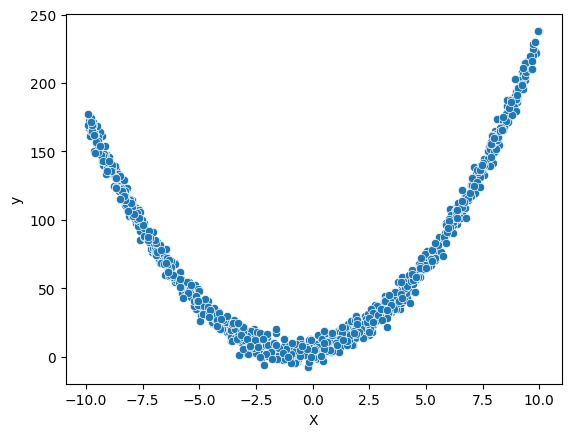

In [5]:
sns.scatterplot(x='X', y='y', data=df)

In [6]:
X = df[['X']]
y = df['y']

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_regression  
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)


In [19]:
f_test = f_regression(X_poly, y)


In [20]:
f_stat, p_values = f_regression(X_poly, y)

print("\nF-statistics:", f_stat)
print("p-values:", p_values)


F-statistics: [    0.            65.9422532  10807.88751237    52.35644175]
p-values: [1.00000000e+00 1.36091664e-15 0.00000000e+00 9.21843221e-13]


In [21]:
feature_names = poly.get_feature_names_out(input_features=['X'])

print("\nInterpretation:")
for name, p in zip(feature_names, p_values):
    significance = "Significant" if p < 0.05 else "Not Significant"
    print(f"Feature '{name}' → p-value = {p:.5f} → {significance}")


Interpretation:
Feature '1' → p-value = 1.00000 → Not Significant
Feature 'X' → p-value = 0.00000 → Significant
Feature 'X^2' → p-value = 0.00000 → Significant
Feature 'X^3' → p-value = 0.00000 → Significant


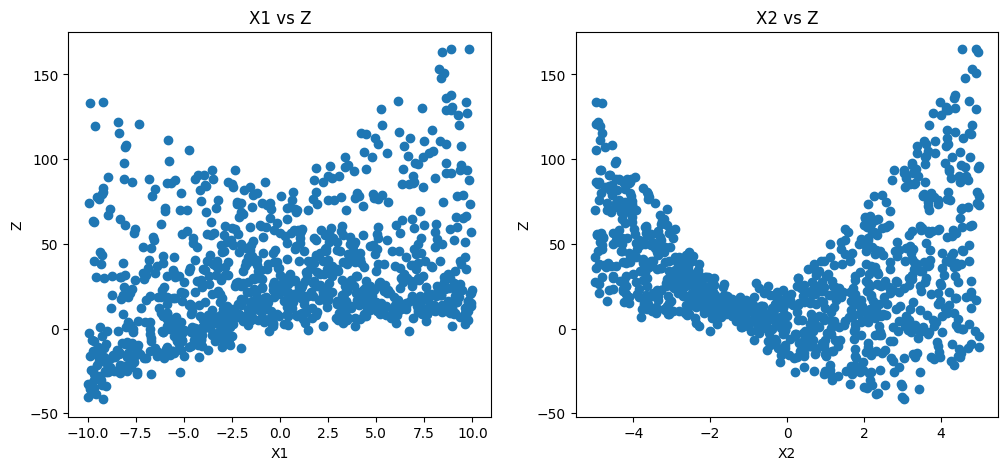

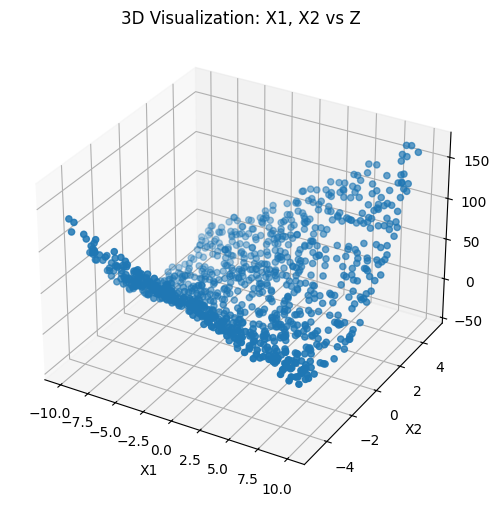


🔎 Linear Model Performance:
MSE: 986.2215495885501
R²: 0.15037649014286614

🔎 Polynomial Regression (Degree 2) Performance:
MSE: 22.161203466051802
R²: 0.9809082660185835

📌 Generated Polynomial Features:
['X1' 'X2' 'X1^2' 'X1 X2' 'X2^2']

📊 Polynomial Feature Significance (F-test):
Feature 'X1' → p-value = 0.00000 → Significant
Feature 'X2' → p-value = 0.58707 → Not Significant
Feature 'X1^2' → p-value = 0.43095 → Not Significant
Feature 'X1 X2' → p-value = 0.00000 → Significant
Feature 'X2^2' → p-value = 0.00000 → Significant


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 🔹 1. Load data
df = pd.read_csv("multi.csv")
X = df[['X1', 'X2']]
y = df['Z']

# 🔹 2. Visualize individual relationships
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['X1'], df['Z'])
plt.title("X1 vs Z")
plt.xlabel("X1")
plt.ylabel("Z")

plt.subplot(1, 2, 2)
plt.scatter(df['X2'], df['Z'])
plt.title("X2 vs Z")
plt.xlabel("X2")
plt.ylabel("Z")
plt.show()

# 🔹 3. 3D Visualization
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X1'], df['X2'], df['Z'])
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Z")
ax.set_title("3D Visualization: X1, X2 vs Z")
plt.show()

# 🔹 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 5a. Linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)
print("\n🔎 Linear Model Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R²:", r2_score(y_test, y_pred_lin))

# 🔹 5b. Polynomial regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
print("\n🔎 Polynomial Regression (Degree 2) Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R²:", r2_score(y_test, y_pred_poly))

# 🔹 6. Show polynomial feature names
feature_names = poly_model.named_steps['poly'].get_feature_names_out(X.columns)
print("\n📌 Generated Polynomial Features:")
print(feature_names)

# 🔹 7. F-Test (check significance of polynomial terms)
X_poly = poly.fit_transform(X)
f_stat, p_values = f_regression(X_poly, y)

print("\n📊 Polynomial Feature Significance (F-test):")
for name, p in zip(feature_names, p_values):
    print(f"Feature '{name}' → p-value = {p:.5f} → {'Significant' if p < 0.05 else 'Not Significant'}")


In [24]:
df = pd.read_csv('significance_test_data.csv')

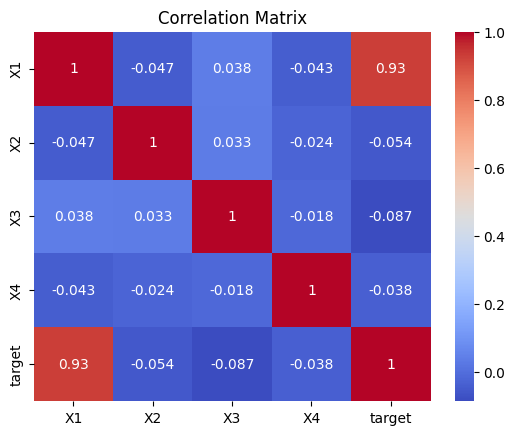

In [25]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [26]:
print(df.corr())

              X1        X2        X3        X4    target
X1      1.000000 -0.047136  0.038311 -0.043030  0.930893
X2     -0.047136  1.000000  0.033475 -0.023987 -0.053670
X3      0.038311  0.033475  1.000000 -0.017639 -0.087037
X4     -0.043030 -0.023987 -0.017639  1.000000 -0.037804
target  0.930893 -0.053670 -0.087037 -0.037804  1.000000


In [27]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Features and target
X = df[['X1', 'X2', 'X3', 'X4']]  # Independent variables
y = df['target']                  # Target variable

# Compute Mutual Information
mi_values = mutual_info_regression(X, y)
mi_series = pd.Series(mi_values, index=X.columns).sort_values(ascending=False)

print("Mutual Information Scores (Higher = Stronger Relationship)")
print(mi_series)


Mutual Information Scores (Higher = Stronger Relationship)
X1    1.021086
X4    0.017906
X2    0.017113
X3    0.008874
dtype: float64


In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load your dataset
df = pd.read_csv("significance_test_data.csv")
X = df[['X1', 'X2', 'X3', 'X4']]  # Features
y = df['target']                  # Target

# Model for RFE
model = LinearRegression()

# RFE – keep best 3 features (you can change this number)
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X, y)

# Output results
selected_features = X.columns[rfe.support_]
ranking = pd.Series(rfe.ranking_, index=X.columns)

print("Selected Features:", list(selected_features))
print("\nFeature Ranking (1 = selected):")
print(ranking)



Selected Features: ['X1', 'X2', 'X3']

Feature Ranking (1 = selected):
X1    1
X2    1
X3    1
X4    2
dtype: int64


In [38]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state=42)
df = pd.read_csv("significance_test_data.csv")
X = df[['X1', 'X2', 'X3', 'X4']]  # Features
y = df['target']                  # Target



In [39]:
rfe2 = RFE(model2, n_features_to_select=3)
rfe2.fit(X, y)
selected_features = X.columns[rfe.support_]
ranking = pd.Series(rfe.ranking_, index=X.columns)

print("Selected Features:", list(selected_features))
print("\nFeature Ranking (1 = selected):")
print(ranking)

Selected Features: ['X1', 'X2', 'X3']

Feature Ranking (1 = selected):
X1    1
X2    1
X3    1
X4    2
dtype: int64
